In [3]:
from astropy.io import fits

fname = "DR19seisages_samp_train456789_net10_method14151617_cluster1819_v2.fits"

with fits.open(fname, memmap=True) as hdul:
    cols = hdul["STARFLOW_TABLE"].columns.names
    print(len(cols))
    print(cols)

423
['sdss_id', 'sdss4_apogee_id', 'gaia_dr2_source_id', 'gaia_dr3_source_id', 'tic_v8_id', 'healpix', 'lead', 'version_id', 'catalogid', 'catalogid21', 'catalogid25', 'catalogid31', 'n_associated', 'n_neighborhood', 'sdss5_target_flags', 'sdss4_apogee_target1_flags', 'sdss4_apogee_target2_flags', 'sdss4_apogee2_target1_flags', 'sdss4_apogee2_target2_flags', 'sdss4_apogee2_target3_flags', 'sdss4_apogee_member_flags', 'sdss4_apogee_extra_target_flags', 'ra', 'dec', 'l', 'b', 'plx', 'e_plx', 'pmra', 'e_pmra', 'pmde', 'e_pmde', 'gaia_v_rad', 'gaia_e_v_rad', 'g_mag', 'bp_mag', 'rp_mag', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag', 'k_mag', 'e_k_mag', 'ph_qual', 'bl_flg', 'cc_flg', 'w1_mag', 'e_w1_mag', 'w1_flux', 'w1_dflux', 'w1_frac', 'w2_mag', 'e_w2_mag', 'w2_flux', 'w2_dflux', 'w2_frac', 'w1uflags', 'w2uflags', 'w1aflags', 'w2aflags', 'mag4_5', 'd4_5m', 'rms_f4_5', 'sqf_4_5', 'mf4_5', 'csf', 'zgr_teff', 'zgr_e_teff', 'zgr_logg', 'zgr_e_logg', 'zgr_fe_h', 'zgr_e_fe_h', 'zgr_e', 'zgr_e_e', 'zg

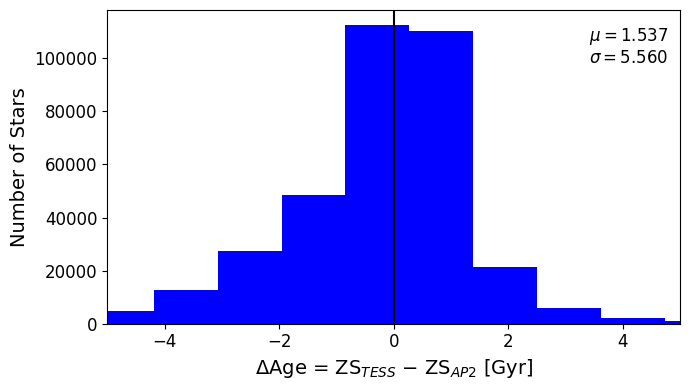

In [14]:
import numpy as np
import matplotlib.pyplot as plt

with fits.open(fname, memmap=True) as hdul:
    data = hdul["STARFLOW_TABLE"].data

agecolumn = "ZS_TESS_training_Age"
baseage   = "ZS_AP2_training_Age"

good = np.where(
    np.isfinite(data[agecolumn]) & np.isfinite(data[baseage]) &
    (data[agecolumn] > 0) & (data[baseage] > 0)
)

delta_age = (data[agecolumn][good] - data[baseage][good]).ravel()

mu = np.mean(delta_age)
sigma = np.std(delta_age)

plt.figure(figsize=(7,4))
plt.hist(delta_age, bins=40, color='blue')
plt.axvline(0.0, color='k', linewidth=1.5)

plt.xlabel(r'$\Delta$Age = ZS$_{TESS}$ $-$ ZS$_{AP2}$ [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xlim([-5, 5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.text(
    0.98, 0.95,
    rf'$\mu={mu:.3f}$' + '\n' + rf'$\sigma={sigma:.3f}$',
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=12
)

plt.tight_layout()
plt.show()
